# Table of Contents
* [1. Abstract](#1.-Abstract)
* [2. Introduction](#2.-Introduction)
	* [2.1 Checklist](#2.1-Checklist)
* [3. Experimental and computational details](#3.-Experimental-and-computational-details)
	* [3.1 Parameters](#3.1-Parameters)
	* [3.2 Initialize analysis framework](#3.2-Initialize-analysis-framework)
* [4. Experimental analysis](#4.-Experimental-analysis)
	* [4.1 Import experimental spectra: linear PNIPAM](#4.1-Import-experimental-spectra:-linear-PNIPAM)
		* [4.1.1 Import data files and organize](#4.1.1-Import-data-files-and-organize)
		* [4.1.2 Plot a sample spectrum to make sure import worked](#4.1.2-Plot-a-sample-spectrum-to-make-sure-import-worked)
	* [4.2 Import experimental spectra: cross-linked PNIPAM](#4.2-Import-experimental-spectra:-cross-linked-PNIPAM)
		* [4.2.1 Import data files and organize](#4.2.1-Import-data-files-and-organize)
		* [4.2.2 Plot a sample spectrum to make sure import worked](#4.2.2-Plot-a-sample-spectrum-to-make-sure-import-worked)
	* [4.3 LSPR peak wavelength trends](#4.3-LSPR-peak-wavelength-trends)
		* [4.3.1 Peak fitting analysis code](#4.3.1-Peak-fitting-analysis-code)
		* [4.3.2 Plot of LSPR peak wavelength position vs tempearture](#4.3.2-Plot-of-LSPR-peak-wavelength-position-vs-tempearture)
		* [4.3.3 Plot of LSPR peak wavelength shift vs temperature](#4.3.3-Plot-of-LSPR-peak-wavelength-shift-vs-temperature)
		* [4.3.4 Plots of hydrodynamic radius and relative hydrodynamics vs temperature](#4.3.4-Plots-of-hydrodynamic-radius-and-relative-hydrodynamics-vs-temperature)
		* [4.3.5 Plot of LSPR peak wavelength vs hydrodynamic radius](#4.3.5-Plot-of-LSPR-peak-wavelength-vs-hydrodynamic-radius)
		* [4.3.6 Plots of LSPR peak shift vs relative hydrodynamic radius](#4.3.6-Plots-of-LSPR-peak-shift-vs-relative-hydrodynamic-radius)
	* [4.4 LSPR peak wavelength trends with simple baseline correction](#4.4-LSPR-peak-wavelength-trends-with-simple-baseline-correction)
		* [4.4.1 Peak fitting analysis code using built-in baseline correction](#4.4.1-Peak-fitting-analysis-code-using-built-in-baseline-correction)
		* [4.4.2 Plot of baseline corrected LSPR peak wavelength position vs tempearture](#4.4.2-Plot-of-baseline-corrected-LSPR-peak-wavelength-position-vs-tempearture)
		* [4.4.3 Plot of baseline corrected LSPR peak wavelength shift vs tempearture](#4.4.3-Plot-of-baseline-corrected-LSPR-peak-wavelength-shift-vs-tempearture)
		* [4.4.4 Plot of baseline corrected LSPR peak shift vs relative hydrodynamic radius](#4.4.4-Plot-of-baseline-corrected-LSPR-peak-shift-vs-relative-hydrodynamic-radius)
* [5. Mie theory modeling](#5.-Mie-theory-modeling)
	* [5.1 Mie theory computations and peak fitting](#5.1-Mie-theory-computations-and-peak-fitting)
		* [5.1.1 Compute Mie theory spectra](#5.1.1-Compute-Mie-theory-spectra)
		* [5.1.2 Sample plot to check results](#5.1.2-Sample-plot-to-check-results)
		* [5.1.3 LSPR peak fitting](#5.1.3-LSPR-peak-fitting)
		* [5.1.4 Plot of LSPR peak position vs refractive index](#5.1.4-Plot-of-LSPR-peak-position-vs-refractive-index)
		* [5.1.5 LSPR peak fitting with built-in baseline correction](#5.1.5-LSPR-peak-fitting-with-built-in-baseline-correction)
		* [5.1.6 Plot of Baseline corrected LSPR peak position vs refractive index](#5.1.6-Plot-of-Baseline-corrected-LSPR-peak-position-vs-refractive-index)
	* [5.2 Correlate Mie theory with experimental spectra](#5.2-Correlate-Mie-theory-with-experimental-spectra)
		* [5.2.1 Plot of near-field/effective refractive index vs hydrodynamic radius](#5.2.1-Plot-of-near-field/effective-refractive-index-vs-hydrodynamic-radius)
		* [5.2.2 Plot of near-field/effective polymer volume fraction vs hydrodynamic radius](#5.2.2-Plot-of-near-field/effective-polymer-volume-fraction-vs-hydrodynamic-radius)
		* [5.2.3 Grafting density caclulations and plots](#5.2.3-Grafting-density-caclulations-and-plots)


The influence of shell structure on plasmonic resonances in core-shell metal-polymer nanoparticles 
=================================

# 1. Abstract

Plasmonic nanoparticles can be encapsulated in polymer shells with the capability for externally triggered swelling and collapse behaviors. This behavior can cause a shift in the LSPR peak wavelength due to changes in the scattering contribution and the NP near-field refractive index. It has been predicted that the increase in refractive index due to collapse will influence the resonance more than the change in scattering, resulting in a net red shift of the resonance peak position. Here we demonstrate this rule experimentally, while also showing that the structure and thickness of the shell play critical roles in the magnitude of the peak wavelength shift. 

# 2. Introduction

## 2.1 Checklist

- Determine peak position of spectra.
    - Linear PNIPAM shells.
    - Cross-linked PNIPAM shells.
- Peak shift as a function of shell collapse.
    - $\Delta\lambda_{\mathrm{LSPR}}$ vs. $V_{\mathrm{shell}}/V_0$.
    - Remove shell scattering contribution.
- Determine the near-field refractive index (NFRI) from a homogeneous medium fit (no shell).
    - Use the NFRI to determine the polymer density.

# 3. Experimental and computational details

## 3.1 Parameters

- Synthesis protocols and structural analysis available in previous works
- Spherical cores and shells
- Core diameters $d_{\text{core}}=$ 17 nm
- Shell diameters $d_{\text{shell}}=$ 20-60 nm
- Au cores, with refractive index (RI) $n_{\text{Au}}$ from J&C 1972
    - included shell scattering RI broadening (from Bohren & Huffman)
- Relevant LSPR peak wavelengths $\lambda=$ 500-550 nm

## 3.2 Initialize analysis framework

In [1]:
%run "header.py"

Loading import modules ...
Loading analysis codes ... 
  ... refractive index functions loaded:
       Au, Ag, SiO2, ITO, ZnO, H2O, 
       ethanol, CS2, benzene, toluene, 
       chloroform, methanol, butanol, 
       propanol
  ... Mie functions loaded
  ... local Mie functions loaded
Ready player one.


In [2]:
%run "header_parallel.py"

Initializing cluster ...
   Client variable 'kernels'
   Cluster Direct View variable 'cluster'
   Variable 'nKernels' = 3
importing mie on engine(s)
importing mie_local on engine(s)


# 4. Experimental analysis

## 4.1 Import experimental spectra: linear PNIPAM

### 4.1.1 Import data files and organize

In [3]:
print("Import and organize data")
print("========================")
folderName = 'data_20160905'
fileNames = []
print("Importing data in folder",folderName,"...")
for file in os.listdir(folderName):
    #if file.endswith('.dat'): 
        fileNames.append(file)
spectraNames = []
spectraTemps = []
def importData(fileName):
    print("  *",fileName)
    headerLines = 0
    if (fileName == 'Au-linPNIPAM-long-hydr-radius.dat'
        or fileName == 'Au-linPNIPAM-medium-hydr-radius.dat'
        or fileName == 'Au-linPNIPAM-short-hydr-radius.dat'): 
        headerLines = 3
    elif (fileName == 'Au-linPNIPAM-long.dat'
          or fileName == 'Au-linPNIPAM-medium.dat'
          or fileName == 'Au-linPNIPAM-short.dat'): 
        headerLines = 2
        columnNames = np.genfromtxt(folderName+'/'+fileName, delimiter='\t', dtype=str, comments='\\', skip_header=0, max_rows=1)[1:-1]
        spectraNames.append(columnNames.tolist())
        temps = []
        for name in columnNames:
            temps.append(float(name[-5:-3]))
        spectraTemps.append(temps)
        #print(columnNames)
    else: headerLines = 2
    tempData = np.genfromtxt(folderName+'/'+fileName, delimiter='\t', skip_header=headerLines)
    return tempData
data = list(map(importData,fileNames))

# Last column indicates sample shell thickness:
# 0 = long (thick)
# 1 = medium
# 2 = short (thin)
print("Oganizing data ...")
dataList = []
for i in range(3):
    dlsData = data[2*i]
    spectraData0 = data[2*i+1]
    temps = spectraTemps[i]
    hydroRs = []
    for T in temps:
        sortByT = np.abs(dlsData[:,0] - T) < 3
        subset = dlsData[sortByT]
        if len(subset) == 0:
            sortByT = np.abs(dlsData[:,1] - T) < 5
            subset = dlsData[sortByT]
        rh = np.mean(subset[:,1])
        hydroRs.append(rh)
    for ii in range(len(temps)):
        for iii in range(len(spectraData0)):
            dataPoint = [ spectraData0[iii,0], spectraData0[iii,ii+1], temps[ii], hydroRs[ii].tolist(), i ]
            dataList.append(dataPoint)
dataArray = np.asarray(dataList)
print("  * extrapolate hydrodynamic radius from DLS to UV-Vis temps")
print("  * organized as [ wl-nm, abs, temp, Rh, sample-# ]")
print("  * sample 0 = thick shell, 1 = medium, 2 = thin")

# Au cores only
spectrumCore = data[-1]
print("  * core alone sorted separately")

print("Done.")

Import and organize data
Importing data in folder data_20160905 ...
  * Au-linPNIPAM-long-hydr-radius.dat
  * Au-linPNIPAM-long.dat
  * Au-linPNIPAM-medium-hydr-radius.dat
  * Au-linPNIPAM-medium.dat
  * Au-linPNIPAM-short-hydr-radius.dat
  * Au-linPNIPAM-short.dat
  * AW5.txt
Oganizing data ...
  * extrapolate hydrodynamic radius from DLS to UV-Vis temps
  * organized as [ wl-nm, abs, temp, Rh, sample-# ]
  * sample 0 = thick shell, 1 = medium, 2 = thin
  * core alone sorted separately
Done.


### 4.1.2 Plot a sample spectrum to make sure import worked

Also plot a zoomed in spectrum to look at noise.

Sample spectrum
Exported to:
 graphics/20160912_sample-spectrum.svg


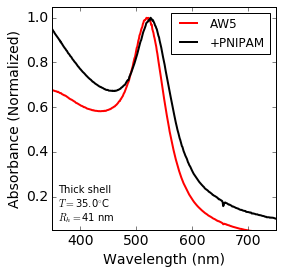

In [4]:
print('Sample spectrum')
print('===============')
def plotAndSave ():   
    ## Input data
    sampleNum = 0
    temp = spectraTemps[sampleNum][7]
    wlMin, wlMax = 350, 750
    
    sortByShell = dataArray[:,-1] == sampleNum
    plotArray = dataArray[sortByShell]
    sortByTemp = plotArray[:,-3] == temp
    plotArray = plotArray[sortByTemp]
    wlRange = plotArray[:,0] >= wlMin
    plotArray = plotArray[wlRange]
    wlRange = plotArray[:,0] <= wlMax
    plotArray = plotArray[wlRange]
    x, y = plotArray[:,0], plotArray[:,1]
    y = y/np.amax(y)
    xCore, yCore = spectrumCore[100:,0], spectrumCore[100:,1]
    yCore = yCore*np.amax(y)/np.amax(yCore)
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y)-np.amax(y)*.05, np.amax(y)*1.05]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(xCore, yCore, color='red', linewidth=2, label="AW5")
    pylab.plot(x, y, color='black', linewidth=2, label="+PNIPAM")
    pylab.xlabel("Wavelength (nm)")
    pylab.ylabel("Absorbance (Normalized)")
    figText = (['Thick','Med.','Thin'][sampleNum]+' shell'+'\n'
        +'$T=$'+str(temp)+'$^{\circ}$C'+'\n'
        + '$R_h=$'+str(int(plotArray[0][-2]))+' nm')
    pylab.text(xLimits[0]+0.025*dx, yLimits[0]+0.025*dy, figText, verticalalignment='bottom', horizontalalignment='left')
    pylab.legend(loc='upper right', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0], yLimits[1])
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_sample-spectrum" + exportFormat
    pylab.savefig(filename)
    print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


Sample spectrum


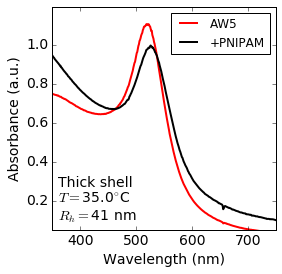

In [5]:
print('Sample spectrum')
print('===============')
def plotAndSave ():   
    ## Input data
    sampleNum = 0
    temp = spectraTemps[sampleNum][7]
    wlMin, wlMax = 350, 750
    
    sortByShell = dataArray[:,-1] == sampleNum
    plotArray = dataArray[sortByShell]
    sortByTemp = plotArray[:,-3] == temp
    plotArray = plotArray[sortByTemp]
    wlRange = plotArray[:,0] >= wlMin
    plotArray = plotArray[wlRange]
    wlRange = plotArray[:,0] <= wlMax
    plotArray = plotArray[wlRange]
    x, y = plotArray[:,0], plotArray[:,1]
    xCore, yCore = spectrumCore[100:,0], spectrumCore[100:,1]
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y)-np.amax(y)*.05, np.amax(y)*1.2]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(xCore, yCore, color='red', linewidth=2, label="AW5")
    pylab.plot(x, y, color='black', linewidth=2, label="+PNIPAM")
    pylab.xlabel("Wavelength (nm)")
    pylab.ylabel("Absorbance (a.u.)")
    figText = (['Thick','Med.','Thin'][sampleNum]+' shell'+'\n'
        +'$T=$'+str(temp)+'$^{\circ}$C'+'\n'
        + '$R_h=$'+str(int(plotArray[0][-2]))+' nm')
    pylab.text(xLimits[0]+0.025*dx, yLimits[0]+0.025*dy, figText, verticalalignment='bottom', horizontalalignment='left')
    pylab.legend(loc='upper right', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0], yLimits[1])
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_sample-spectrum" + exportFormat
    # pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


Sample spectrum
Exported to:
 graphics/20160912_sample-spectrum-zoom.svg


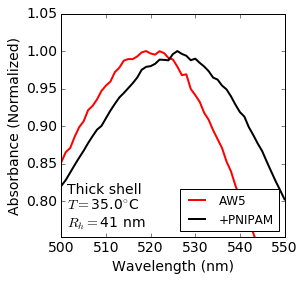

In [6]:
print('Sample spectrum')
print('===============')
def plotAndSave ():   
    ## Input data
    sampleNum = 0
    temp = spectraTemps[sampleNum][7]
    wlMin, wlMax = 500, 550
    
    sortByShell = dataArray[:,-1] == sampleNum
    plotArray = dataArray[sortByShell]
    sortByTemp = plotArray[:,-3] == temp
    plotArray = plotArray[sortByTemp]
    wlRange = plotArray[:,0] >= wlMin
    plotArray = plotArray[wlRange]
    wlRange = plotArray[:,0] <= wlMax
    plotArray = plotArray[wlRange]
    x, y = plotArray[:,0], plotArray[:,1]
    y = y/np.amax(y)
    xCore, yCore = spectrumCore[100:,0], spectrumCore[100:,1]
    yCore = yCore*np.amax(y)/np.amax(yCore)
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y)-np.amax(y)*.05, np.amax(y)*1.05]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(xCore, yCore, color='red', linewidth=2, label="AW5")
    pylab.plot(x, y, color='black', linewidth=2, label="+PNIPAM")
    pylab.xlabel("Wavelength (nm)")
    pylab.ylabel("Absorbance (Normalized)")
    figText = (['Thick','Med.','Thin'][sampleNum]+' shell'+'\n'
        +'$T=$'+str(temp)+'$^{\circ}$C'+'\n'
        + '$R_h=$'+str(int(plotArray[0][-2]))+' nm')
    pylab.text(xLimits[0]+0.025*dx, yLimits[0]+0.025*dy, figText, verticalalignment='bottom', horizontalalignment='left')
    pylab.legend(loc='lower right', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0], yLimits[1])
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_sample-spectrum-zoom" + exportFormat
    pylab.savefig(filename)
    print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


## 4.2 Import experimental spectra: cross-linked PNIPAM

### 4.2.1 Import data files and organize

In [7]:
print("Import and organize data")
print("========================")
folderName = 'data_20160906'
fileNames = []
print("Importing data in folder",folderName,"...")
for file in os.listdir(folderName):
    #if file.endswith('.dat'): 
        fileNames.append(file)
spectraXTemps = []
def importData(fileName):
    print("  *",fileName)
    headerLines = 3
    if (fileName == 'temperature-calibration.dat'): 
        headerLines = 2
    if (fileName == 'Au-xPNIPAM-long.dat'
          or fileName == 'Au-xPNIPAM-medium.dat'
          or fileName == 'Au-xPNIPAM-short.dat'): 
        temps = np.genfromtxt(folderName+'/'+fileName, delimiter='\t', skip_header=2, max_rows=1)[1:-1]
        spectraXTemps.append(temps)
        #print(temps)

    tempData = np.genfromtxt(folderName+'/'+fileName, delimiter='\t', skip_header=headerLines)
    # print(tempData)
    return tempData
data = list(map(importData,fileNames))
tempConvert = interpolate.interp1d(data[-1][:,0], data[-1][:,1], kind="cubic")
spectraXTemps = list(map(tempConvert,spectraXTemps))

# Last column indicates sample shell thickness:
# 0 = long (thick)
# 1 = medium
# 2 = short (thin)
print("Oganizing data ...")
dataXList = []
for i in range(3):
    dlsData = data[1+2*i]
    spectraData0 = data[1+2*i+1]
    temps = spectraXTemps[i]
    hydroRs = []
    for T in temps:
        sortByT = np.abs(dlsData[:,0] - T) < 3
        subset = dlsData[sortByT]
        if len(subset) == 0:
            sortByT = np.abs(dlsData[:,1] - T) < 5
            subset = dlsData[sortByT]
        rh = np.mean(subset[:,1])
        hydroRs.append(rh)
    for ii in range(len(temps)):
        for iii in range(len(spectraData0)):
            dataPoint = [ spectraData0[iii,0], spectraData0[iii,ii+1], temps[ii], hydroRs[ii].tolist(), i ]
            dataXList.append(dataPoint)
dataXArray = np.asarray(dataXList)
print("  * extrapolate hydrodynamic radius from DLS to UV-Vis temps")
print("  * organized as [ wl-nm, abs, temp, Rh, sample-# ]")
print("  * sample 0 = thick shell, 1 = medium, 2 = thin")

# Au cores only
spectrumXCore = data[0]
print("  * core alone sorted separately")

print("Done.")

Import and organize data
Importing data in folder data_20160906 ...
  * Au-core-only-for-xPNIPAM.dat
  * Au-xPNIPAM-long-hydr-radius.dat
  * Au-xPNIPAM-long.dat
  * Au-xPNIPAM-medium-hydr-radius.dat
  * Au-xPNIPAM-medium.dat
  * Au-xPNIPAM-short-hydr-radius.dat
  * Au-xPNIPAM-short.dat
  * temperature-calibration.dat
Oganizing data ...
  * extrapolate hydrodynamic radius from DLS to UV-Vis temps
  * organized as [ wl-nm, abs, temp, Rh, sample-# ]
  * sample 0 = thick shell, 1 = medium, 2 = thin
  * core alone sorted separately
Done.


### 4.2.2 Plot a sample spectrum to make sure import worked

Sample spectrum


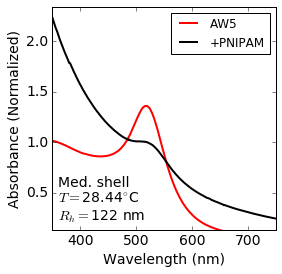

In [8]:
print('Sample spectrum')
print('===============')
def plotAndSave ():   
    ## Input data
    sampleNum = 1
    temp = spectraXTemps[sampleNum][7]
    wlMin, wlMax = 350, 750
    
    sortByShell = dataXArray[:,-1] == sampleNum
    plotArray = dataXArray[sortByShell]
    sortByTemp = plotArray[:,-3] == temp
    plotArray = plotArray[sortByTemp]
    wlRange = plotArray[:,0] >= wlMin
    plotArray = plotArray[wlRange]
    wlRange = plotArray[:,0] <= wlMax
    plotArray = plotArray[wlRange]
    x, y = plotArray[:,0], plotArray[:,1]
    y = y/y[170]
    xCore, yCore = spectrumXCore[160:,0], spectrumXCore[160:,1]
    yCore = yCore/yCore[10]
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y)-np.amax(y)*.05, np.amax(y)*1.05]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(xCore, yCore, color='red', linewidth=2, label="AW5")
    pylab.plot(x, y, color='black', linewidth=2, label="+PNIPAM")
    pylab.xlabel("Wavelength (nm)")
    pylab.ylabel("Absorbance (Normalized)")
    figText = (['Thick','Med.','Thin'][sampleNum]+' shell'+'\n'
        +'$T=$'+str(temp)+'$^{\circ}$C'+'\n'
        + '$R_h=$'+str(int(plotArray[0][-2]))+' nm')
    pylab.text(xLimits[0]+0.025*dx, yLimits[0]+0.025*dy, figText, verticalalignment='bottom', horizontalalignment='left')
    pylab.legend(loc='upper right', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0], yLimits[1])
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_sample-spectrum" + exportFormat
    # pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


Sample spectrum


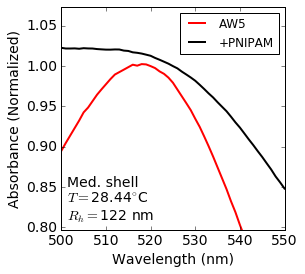

In [9]:
print('Sample spectrum')
print('===============')
def plotAndSave ():   
    ## Input data
    sampleNum = 1
    temp = spectraXTemps[sampleNum][7]
    wlMin, wlMax = 500, 550
    
    sortByShell = dataXArray[:,-1] == sampleNum
    plotArray = dataXArray[sortByShell]
    sortByTemp = plotArray[:,-3] == temp
    plotArray = plotArray[sortByTemp]
    wlRange = plotArray[:,0] >= wlMin
    plotArray = plotArray[wlRange]
    wlRange = plotArray[:,0] <= wlMax
    plotArray = plotArray[wlRange]
    x, y = plotArray[:,0], plotArray[:,1]
    y = y/y[25]
    xCore, yCore = spectrumXCore[110:,0], spectrumXCore[110:,1]
    yCore = yCore/yCore[220]
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y)-np.amax(y)*.05, np.amax(y)*1.05]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(xCore, yCore, color='red', linewidth=2, label="AW5")
    pylab.plot(x, y, color='black', linewidth=2, label="+PNIPAM")
    pylab.xlabel("Wavelength (nm)")
    pylab.ylabel("Absorbance (Normalized)")
    figText = (['Thick','Med.','Thin'][sampleNum]+' shell'+'\n'
        +'$T=$'+str(temp)+'$^{\circ}$C'+'\n'
        + '$R_h=$'+str(int(plotArray[0][-2]))+' nm')
    pylab.text(xLimits[0]+0.025*dx, yLimits[0]+0.025*dy, figText, verticalalignment='bottom', horizontalalignment='left')
    pylab.legend(loc='upper right', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0], yLimits[1])
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_sample-spectrum-zoom" + exportFormat
    # pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


## Combine data sets

In [10]:
spectraCores = np.array([spectrumCore, spectrumXCore])
dataSuperArray = np.array([dataArray, dataXArray])
spectraSuperTemps = np.asarray([spectraTemps, spectraXTemps])

## 4.3 LSPR peak wavelength trends

### 4.3.1 Peak fitting analysis code

In [15]:
print("LSPR analysis")
print("=============")
threshold = 0.75
wlMinnm, wlMaxnm = 375, 800
wlExpectednm = 525
dwlExpectednm = 30

# Core only
print('LSPR peak wavelength of bare cores')
lsprPeakWLnmCores = []
shellNum = 0
for spectrumData in spectraCores:
    wlRange = spectrumData[:,0] >= wlMinnm
    dataSubArray = spectrumData[wlRange]
    wlRange = dataSubArray[:,0] <= wlMaxnm
    dataSubArray = dataSubArray[wlRange]
    if dataSubArray.size > 0:
        x, y = dataSubArray[:,0], dataSubArray[:,1]
        indexes = peakutils.indexes(y, thres=threshold, min_dist=10)
        xIndexes = x[indexes]
        if indexes.size > 0: 
            selectIndexes = (xIndexes >= wlExpectednm - dwlExpectednm)
            indexes = indexes[selectIndexes]
            xIndexes = x[indexes]
            selectIndexes = (xIndexes <= wlExpectednm + dwlExpectednm)
            indexes = indexes[selectIndexes]
            if indexes.size > 1: indexes = np.array([indexes[-1]])
            if indexes.size > 0:
                wlPeaknm = (peakutils.interpolate(x, y, ind=indexes))[0]
                lsprPeakWLnmCores.append(wlPeaknm)
                print("  * for",["linear","X-linked"][shellNum],"PNIPAM shells,", format(wlPeaknm,'.1f'), " nm")
    shellNum = shellNum+1



LSPR analysis
LSPR peak wavelength of bare cores
  * for linear PNIPAM shells, 519.7  nm
  * for X-linked PNIPAM shells, 517.5  nm


In [16]:
# Shell
print('LSPR peak wavelength of cores with shells')

lsprPeakList = []
shellNum = 0
for dataSubArray0 in dataSuperArray:
    lsprPeakSubList = []
    for sampleNum in range(3):
        for tempC in spectraSuperTemps[shellNum][sampleNum]:
            sortByShell = dataSubArray0[:,-1] == sampleNum
            dataSubArray = dataSubArray0[sortByShell]
            sortByTemp = dataSubArray[:,-3] == tempC
            dataSubArray = dataSubArray[sortByTemp]
            wlRange = dataSubArray[:,0] >= wlMinnm
            dataSubArray = dataSubArray[wlRange]
            wlRange = dataSubArray[:,0] <= wlMaxnm
            dataSubArray = dataSubArray[wlRange]
            if dataSubArray.size > 0:
                Rh = dataSubArray[0][-2]
                x, y = dataSubArray[:,0], dataSubArray[:,1]
                indexes = peakutils.indexes(y, thres=threshold, min_dist=10)
                xIndexes = x[indexes]
                if indexes.size > 0: 
                    selectIndexes = (xIndexes >= wlExpectednm - dwlExpectednm)
                    indexes = indexes[selectIndexes]
                    xIndexes = x[indexes]
                    selectIndexes = (xIndexes <= wlExpectednm + dwlExpectednm)
                    indexes = indexes[selectIndexes]
                    if indexes.size > 1: indexes = np.array([indexes[-1]])
                    if indexes.size > 0: 
                        if x[indexes] > 510: wlPeaknm = peakutils.interpolate(x, y, ind=indexes)
                        else: wlPeaknm = x[indexes]
                        result = [ wlPeaknm[0], tempC, Rh, sampleNum, shellNum ]
                        lsprPeakSubList.append(wlPeaknm[0])
                        lsprPeakList.append(result)
                    
    print("  *", ["linear","x-linked"][shellNum], "PNIPAM shells (min,max) = (", format(min(lsprPeakSubList),'.1f'), ",", format(max(lsprPeakSubList), '.1f'),")")
    shellNum = shellNum + 1

lsprPeakArray = np.asarray(lsprPeakList)
print("  * output array format: [ wl-nm, temp-C, Rh-nm, sample-#, shell-# ]")
print("    - sample-# = [0,1,2] for [long, medium, short]")
print("    - shell-# = [0,1] for [linear, x-linked]")

LSPR peak wavelength of cores with shells
  * linear PNIPAM shells (min,max) = ( 523.4 , 526.3 )
  * x-linked PNIPAM shells (min,max) = ( 522.5 , 525.1 )
  * output array format: [ wl-nm, temp-C, Rh-nm, sample-#, shell-# ]
    - sample-# = [0,1,2] for [long, medium, short]
    - shell-# = [0,1] for [linear, x-linked]


### 4.3.2 Plot of LSPR peak wavelength position vs tempearture

LSPR peak wavelength vs temperature
Exported to:
 graphics/20160912_wl-LSPR-vs-temp.svg


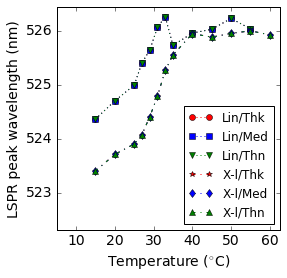

In [21]:
print('LSPR peak wavelength vs temperature')
print('===============')
def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakArray
    x, y = plotArray[:,1], plotArray[:,0]
    xs, ys = [], []
    for shellNum in range(2):
        for sampleNum in range(3):
            sortByShell = (plotArray[:,-2:-1] == [shellNum, sampleNum])[:,0]
            xs.append(x[sortByShell]) 
            ys.append(y[sortByShell])
        
    ## Specific format options
    pylab.plot(xs[0], ys[0], 'o:', color='red', label="Lin/Thk")
    pylab.plot(xs[1], ys[1], 's:', color='blue', label="Lin/Med")
    pylab.plot(xs[2], ys[2], 'v:', color='green', label="Lin/Thn")
    pylab.plot(xs[3], ys[3], '*-.', color='red', label="X-l/Thk")
    pylab.plot(xs[4], ys[4], 'd-.', color='blue', label="X-l/Med")
    pylab.plot(xs[5], ys[5], '^-.', color='green', label="X-l/Thn")
    pylab.xlabel("Temperature ($^{\circ}$C)")
    pylab.ylabel("LSPR peak wavelength (nm)")
    pylab.legend(loc='lower right', fontsize=12)
    
    ## General format options
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    xLimits = [np.amin(x)-0.05*dx, np.amax(x)+0.05*dx]
    yLimits = [np.amin(y)-0.05*dy, np.amax(y)+0.05*dy]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])

    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0], yLimits[1])
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_wl-LSPR-vs-temp" + exportFormat
    pylab.savefig(filename)
    print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


Interpretation
- The offset between the thick and medium shell curves at low temperatures shows that there is more polymer near the core. 
- The plateau in the thick shell curve at high temperatures is (probably) due to increased scattering. This limits the maximum LSPR shift.
- The thin and medium shell curves are the same at low temperatures, so they have similar amounts of polymer near the core.
- The difference between the thin and medium shell curves at high temperatures shows that the collapse of the thin shell brings it inside the near-field zone. Thus, the LSPR is influenced by the pure solvent too at high temperatures with a thin shell, limiting the maximum LSPR shift.

### 4.3.3 Plot of LSPR peak wavelength shift vs temperature

LSPR peak wavelength vs temperature
Exported to:
 graphics/20160912_wl-LSPR-vs-temp.svg


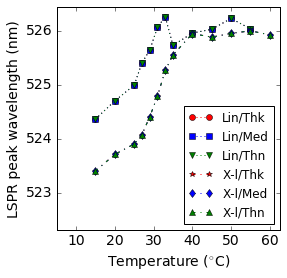

In [21]:
print('LSPR peak wavelength shift vs temperature')
print('===============')
def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakArray
    x, y = plotArray[:,1], plotArray[:,0]
    xs, ys = [], []
    for shellNum in range(2):
        for sampleNum in range(3):
            sortByShell = (plotArray[:,-2:-1] == [shellNum, sampleNum])[:,0]
            xs.append(x[sortByShell]) 
            ys.append(y[sortByShell])
        
    ## Specific format options
    pylab.plot(xs[0], ys[0], 'o:', color='red', label="Lin/Thk")
    pylab.plot(xs[1], ys[1], 's:', color='blue', label="Lin/Med")
    pylab.plot(xs[2], ys[2], 'v:', color='green', label="Lin/Thn")
    pylab.plot(xs[3], ys[3], '*-.', color='red', label="X-l/Thk")
    pylab.plot(xs[4], ys[4], 'd-.', color='blue', label="X-l/Med")
    pylab.plot(xs[5], ys[5], '^-.', color='green', label="X-l/Thn")
    pylab.xlabel("Temperature ($^{\circ}$C)")
    pylab.ylabel("LSPR peak wavelength (nm)")
    pylab.legend(loc='lower right', fontsize=12)
    
    ## General format options
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    xLimits = [np.amin(x)-0.05*dx, np.amax(x)+0.05*dx]
    yLimits = [np.amin(y)-0.05*dy, np.amax(y)+0.05*dy]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])

    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0], yLimits[1])
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_wl-LSPR-vs-temp" + exportFormat
    pylab.savefig(filename)
    print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


LSPR peak wavelength vs temperature
Exported to:
 graphics/20160906_dwl-LSPR-vs-temp.svg


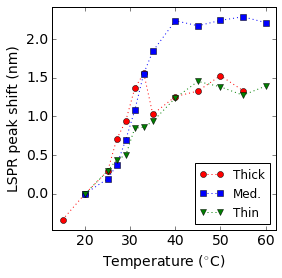

In [379]:
print('LSPR peak wavelength vs temperature')
print('===============')
def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakArray[:,0:2]
    x, y = plotArray[:,1], plotArray[:,0]
    x1, y1 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x2, y2 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x3, y3 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    y1, y2, y3 = y1-y1[1], y2-y2[0], y3-y3[0] # at 20C
    y = np.concatenate((y1, y2, y3))
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(x1, y1, 'o:', color='red', label="Thick")
    pylab.plot(x2, y2, 's:', color='blue', label="Med.")
    pylab.plot(x3, y3, 'v:', color='green', label="Thin")
    pylab.xlabel("Temperature ($^{\circ}$C)")
    pylab.ylabel("LSPR peak shift (nm)")
    pylab.legend(loc='lower right', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0]-0.05*dx, xLimits[1]+0.05*dx)
    pylab.ylim(yLimits[0]-0.05*dy, yLimits[1]+0.05*dy)
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_dwl-LSPR-vs-temp" + exportFormat
    pylab.savefig(filename)
    print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


### 4.3.4 Plots of hydrodynamic radius and relative hydrodynamics vs temperature

- This DLS data is averaged to determine the hydrodynamic radius of the particles at the temperatures at which the spectra are taken.
- Relative changes can be shown using the maximum or the minimum $R_h$ as normalization

Temperature vs hydrodynamic radius
Exported to:
 graphics/20160906_Rh-vs-Temp.svg


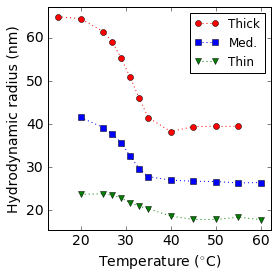

In [380]:
print('Temperature vs hydrodynamic radius')
print('===============')
def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakArray[:,1:3]
    x, y = plotArray[:,0], plotArray[:,1]
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    x1, y1 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x2, y2 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x3, y3 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    
    ## Specific format options
    pylab.plot(x1, y1, 'o:', color='red', label="Thick")
    pylab.plot(x2, y2, 's:', color='blue', label="Med.")
    pylab.plot(x3, y3, 'v:', color='green', label="Thin")
    pylab.xlabel("Temperature ($^{\circ}$C)")
    pylab.ylabel("Hydrodynamic radius (nm)")
    pylab.legend(loc='upper right', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0]-0.05*dx, xLimits[1]+0.05*dx)
    pylab.ylim(yLimits[0]-0.05*dy, yLimits[1]+0.05*dy)
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_Rh-vs-Temp" + exportFormat
    pylab.savefig(filename)
    print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


Temperature vs hydrodynamic radius


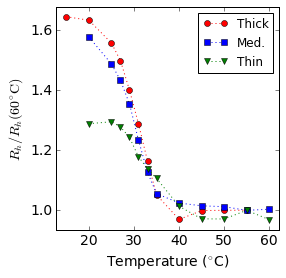

In [381]:
print('Temperature vs hydrodynamic radius')
print('===============')
def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakArray[:,1:3]
    x, y = plotArray[:,0], plotArray[:,1]
    x1, y1 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x2, y2 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x3, y3 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    y1, y2, y3 = y1/np.mean(y1[-2:-1]), y2/np.mean(y2[-2:-1]), y3/np.mean(y3[-2:-1])
    y = np.concatenate((y1,y2,y3))
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(x1, y1, 'o:', color='red', label="Thick")
    pylab.plot(x2, y2, 's:', color='blue', label="Med.")
    pylab.plot(x3, y3, 'v:', color='green', label="Thin")
    pylab.xlabel("Temperature ($^{\circ}$C)")
    pylab.ylabel("$R_h/R_h(60^{\circ}\mathrm{C})$")
    pylab.legend(loc='upper right', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0]-0.05*dx, xLimits[1]+0.05*dx)
    pylab.ylim(yLimits[0]-0.05*dy, yLimits[1]+0.05*dy)
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_Rh-rel-vs-Temp" + exportFormat
    #pylab.savefig(filename)
    #print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


Temperature vs hydrodynamic radius


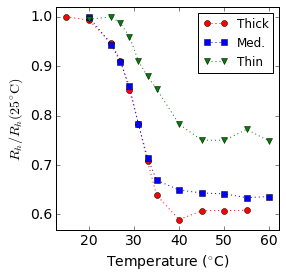

In [382]:
print('Temperature vs hydrodynamic radius')
print('===============')
def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakArray[:,1:3]
    x, y = plotArray[:,0], plotArray[:,1]
    x1, y1 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x2, y2 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x3, y3 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    y1, y2, y3 = y1/y1[0], y2/y2[0], y3/y3[1]
    y = np.concatenate((y1,y2,y3))
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(x1, y1, 'o:', color='red', label="Thick")
    pylab.plot(x2, y2, 's:', color='blue', label="Med.")
    pylab.plot(x3, y3, 'v:', color='green', label="Thin")
    pylab.xlabel("Temperature ($^{\circ}$C)")
    pylab.ylabel("$R_h/R_h(25^{\circ}\mathrm{C})$")
    pylab.legend(loc='upper right', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0]-0.05*dx, xLimits[1]+0.05*dx)
    pylab.ylim(yLimits[0]-0.05*dy, yLimits[1]+0.05*dy)
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_Rh-rel-vs-Temp" + exportFormat
    # pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


### 4.3.5 Plot of LSPR peak wavelength vs hydrodynamic radius

LSPR peak wavelength vs hydrodynamic radius
Exported to:
 graphics/20160906_wl-LSPR-vs-Rh.svg


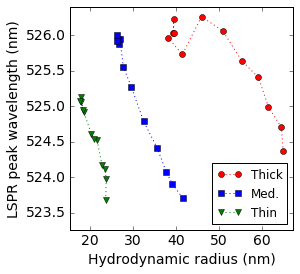

In [383]:
print('LSPR peak wavelength vs hydrodynamic radius')
print('===============')
def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakArray[:,0:3:2]
    x, y = plotArray[:,1], plotArray[:,0]
    x0, y0 = [9.0], [wlPeakCorenm]
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    x1, y1 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x2, y2 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x3, y3 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    
    ## Specific format options
    pylab.plot(x1, y1, 'o:', color='red', label="Thick")
    pylab.plot(x2, y2, 's:', color='blue', label="Med.")
    pylab.plot(x3, y3, 'v:', color='green', label="Thin")
    pylab.xlabel("Hydrodynamic radius (nm)")
    pylab.ylabel("LSPR peak wavelength (nm)")
    pylab.legend(loc='lower right', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0]-0.05*dx, xLimits[1]+0.05*dx)
    pylab.ylim(yLimits[0]-0.05*dy, yLimits[1]+0.05*dy)
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_wl-LSPR-vs-Rh" + exportFormat
    pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


Expanded plot below shows LSPR peak from bare Au NP. Note that it is significantly different.

LSPR peak wavelength vs hydrodynamic radius
Exported to:
 graphics/20160906_wl-LSPR-vs-Rh.svg


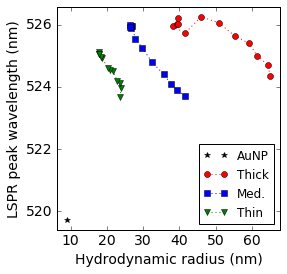

In [393]:
print('LSPR peak wavelength vs hydrodynamic radius')
print('===============')
def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakArray[:,0:3:2]
    x, y = plotArray[:,1], plotArray[:,0]
    x0, y0 = [9.0], [wlPeakCorenm]
    xLimits = [np.amin(x), np.amax(x)]
    xLimits[0] = min([xLimits[0],x0[0]])
    yLimits = [np.amin(y), np.amax(y)]
    yLimits[0] = min([yLimits[0],y0[0]])
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    x1, y1 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x2, y2 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x3, y3 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    
    ## Specific format options
    pylab.plot(x0, y0, '*', color='black', label="AuNP")
    pylab.plot(x1, y1, 'o:', color='red', label="Thick")
    pylab.plot(x2, y2, 's:', color='blue', label="Med.")
    pylab.plot(x3, y3, 'v:', color='green', label="Thin")
    pylab.xlabel("Hydrodynamic radius (nm)")
    pylab.ylabel("LSPR peak wavelength (nm)")
    pylab.legend(loc='lower right', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0]-0.05*dx, xLimits[1]+0.05*dx)
    pylab.ylim(yLimits[0]-0.05*dy, yLimits[1]+0.05*dy)
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_wl-LSPR-vs-Rh" + exportFormat
    pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


### 4.3.6 Plots of LSPR peak shift vs relative hydrodynamic radius

Several different normalizations are used, including: 
- max vs min size
- shell thickness vs total radius
- volume vs radius  

LSPR peak wavelength vs hydrodynamic radius


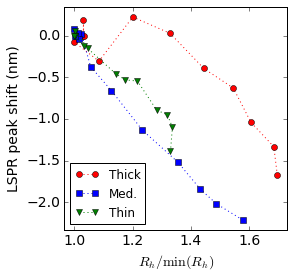

In [385]:
print('LSPR peak wavelength vs hydrodynamic radius')
print('===============')
def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakArray[:,0:3:2]
    x, y = plotArray[:,1], plotArray[:,0]
    x0, y0 = [9.0], [wlPeakCorenm]
    x1, y1 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x2, y2 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x3, y3 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    x1, x2, x3 = x1/min(x1), x2/min(x2), x3/min(x3)
    x = np.concatenate((x1,x2,x3))
    y1, y2, y3 = y1-y1[-1], y2-y2[-1], y3-y3[-1]
    y = np.concatenate((y1,y2,y3))
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(x1, y1, 'o:', color='red', label="Thick")
    pylab.plot(x2, y2, 's:', color='blue', label="Med.")
    pylab.plot(x3, y3, 'v:', color='green', label="Thin")
    pylab.xlabel("$R_h/\mathrm{min}(R_h)$")
    pylab.ylabel("LSPR peak shift (nm)")
    pylab.legend(loc='lower left', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0]-0.05*dx, xLimits[1]+0.05*dx)
    pylab.ylim(yLimits[0]-0.05*dy, yLimits[1]+0.05*dy)
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_dwl-LSPR-vs-Rh-rel" + exportFormat
    #pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


LSPR peak wavelength vs hydrodynamic radius
Exported to:
 graphics_20160906_dwl-LSPR-vs-Rh-rel.svg


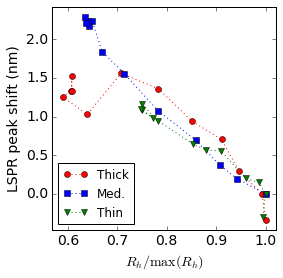

In [386]:
print('LSPR peak wavelength vs hydrodynamic radius')
print('===============')
def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakArray[:,0:3:2]
    x, y = plotArray[:,1], plotArray[:,0]
    x0, y0 = [9.0], [wlPeakCorenm]
    x1, y1 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x2, y2 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x3, y3 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    x1, x2, x3 = x1/max(x1), x2/max(x2), x3/max(x3)
    x = np.concatenate((x1,x2,x3))
    y1, y2, y3 = y1-y1[1], y2-y2[0], y3-y3[1]
    y = np.concatenate((y1,y2,y3))
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(x1, y1, 'o:', color='red', label="Thick")
    pylab.plot(x2, y2, 's:', color='blue', label="Med.")
    pylab.plot(x3, y3, 'v:', color='green', label="Thin")
    pylab.xlabel("$R_h/\mathrm{max}(R_h)$")
    pylab.ylabel("LSPR peak shift (nm)")
    pylab.legend(loc='lower left', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0]-0.05*dx, xLimits[1]+0.05*dx)
    pylab.ylim(yLimits[0]-0.05*dy, yLimits[1]+0.05*dy)
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics_" + timestamp + "_dwl-LSPR-vs-Rh-rel" + exportFormat
    pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


LSPR peak wavelength vs hydrodynamic radius
Exported to:
 graphics/20160906_dwl-LSPR-vs-Vh-rel.svg


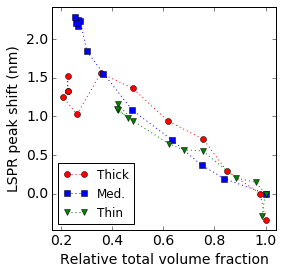

In [388]:
print('LSPR peak wavelength vs hydrodynamic radius')
print('===============')
def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakArray[:,0:3:2]
    x, y = plotArray[:,1], plotArray[:,0]
    x0, y0 = [9.0], [wlPeakCorenm]
    x1, y1 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x2, y2 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x3, y3 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    x1, x2, x3 = x1/max(x1), x2/max(x2), x3/max(x3)
    x1, x2, x3 = x1**3, x2**3, x3**3
    x = np.concatenate((x1,x2,x3))
    y1, y2, y3 = y1-y1[1], y2-y2[0], y3-y3[1]
    y = np.concatenate((y1,y2,y3))
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(x1, y1, 'o:', color='red', label="Thick")
    pylab.plot(x2, y2, 's:', color='blue', label="Med.")
    pylab.plot(x3, y3, 'v:', color='green', label="Thin")
    pylab.xlabel("Relative total volume fraction")
    pylab.ylabel("LSPR peak shift (nm)")
    pylab.legend(loc='lower left', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0]-0.05*dx, xLimits[1]+0.05*dx)
    pylab.ylim(yLimits[0]-0.05*dy, yLimits[1]+0.05*dy)
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_dwl-LSPR-vs-Vh-rel" + exportFormat
    pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


LSPR peak wavelength vs hydrodynamic radius
using a core radius of 8.5 nm


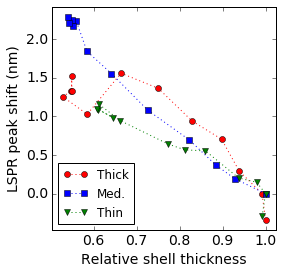

In [389]:
print('LSPR peak wavelength vs hydrodynamic radius')
print('===============')
print('using a core radius of 8.5 nm')
rCorenm = 8.5
def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakArray[:,0:3:2]
    x, y = plotArray[:,1], plotArray[:,0]
    x0, y0 = [9.0], [wlPeakCorenm]
    x1, y1 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x2, y2 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x3, y3 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    x1, x2, x3 = (x1-rCorenm)/(max(x1)-rCorenm), (x2-rCorenm)/(max(x2)-rCorenm), (x3-rCorenm)/(max(x3)-rCorenm)
    x = np.concatenate((x1,x2,x3))
    y1, y2, y3 = y1-y1[1], y2-y2[0], y3-y3[1]
    y = np.concatenate((y1,y2,y3))
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(x1, y1, 'o:', color='red', label="Thick")
    pylab.plot(x2, y2, 's:', color='blue', label="Med.")
    pylab.plot(x3, y3, 'v:', color='green', label="Thin")
    pylab.xlabel("Relative shell thickness")
    pylab.ylabel("LSPR peak shift (nm)")
    pylab.legend(loc='lower left', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0]-0.05*dx, xLimits[1]+0.05*dx)
    pylab.ylim(yLimits[0]-0.05*dy, yLimits[1]+0.05*dy)
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_dwl-LSPR-vs-Rh-rel" + exportFormat
    #pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


LSPR peak wavelength vs hydrodynamic radius
using a core radius of 8.5 nm


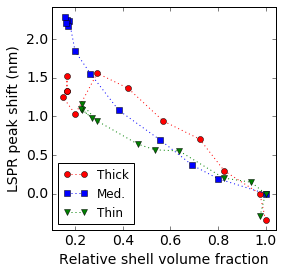

In [390]:
print('LSPR peak wavelength vs hydrodynamic radius')
print('===============')
print('using a core radius of 8.5 nm')
rCorenm = 8.5
def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakArray[:,0:3:2]
    x, y = plotArray[:,1], plotArray[:,0]
    x0, y0 = [9.0], [wlPeakCorenm]
    x1, y1 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x2, y2 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x3, y3 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    x1, x2, x3 = (x1-rCorenm)/(max(x1)-rCorenm), (x2-rCorenm)/(max(x2)-rCorenm), (x3-rCorenm)/(max(x3)-rCorenm)
    x1, x2, x3 = x1**3, x2**3, x3**3
    x = np.concatenate((x1,x2,x3))
    y1, y2, y3 = y1-y1[1], y2-y2[0], y3-y3[1]
    y = np.concatenate((y1,y2,y3))
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(x1, y1, 'o:', color='red', label="Thick")
    pylab.plot(x2, y2, 's:', color='blue', label="Med.")
    pylab.plot(x3, y3, 'v:', color='green', label="Thin")
    pylab.xlabel("Relative shell volume fraction")
    pylab.ylabel("LSPR peak shift (nm)")
    pylab.legend(loc='lower left', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0]-0.05*dx, xLimits[1]+0.05*dx)
    pylab.ylim(yLimits[0]-0.05*dy, yLimits[1]+0.05*dy)
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_dwl-LSPR-vs-Rh-rel" + exportFormat
    #pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


## 4.4 LSPR peak wavelength trends with simple baseline correction

### 4.4.1 Peak fitting analysis code using built-in baseline correction

In [159]:
print("LSPR analysis")
print("=============")
print("Peak detection with baseline correction")
threshold = 0.25
wlMinnm, wlMaxnm = 300, 900
degPolyBaseline = 1

print("  * log-log scale")
print("  * iterative polynomial fit, with polynomial degree =",degPolyBaseline)

# Core only
wlPeakCorrCorenm = 0
baselineCore = []
baselineSpectrumCore = []
lsprPeakAbs = 0
wlRange = spectrumCore[:,0] >= wlMinnm
dataSubArray = spectrumCore[wlRange]
wlRange = dataSubArray[:,0] <= wlMaxnm
dataSubArray = dataSubArray[wlRange]
if dataSubArray.size > 0:
    x, y = dataSubArray[:,0], dataSubArray[:,1]
    base = peakutils.baseline(y, degPolyBaseline)
    yCorr = y - base
    baselineCore = base
    baselineSpectrumCore = np.asarray([x, baselineCore]).transpose()
    indexes = peakutils.indexes(y, thres=threshold, min_dist=10)
    indexesCorr = peakutils.indexes(yCorr, thres=threshold, min_dist=10)
    if indexesCorr.size > 0: 
        if indexesCorr.size > 1: indexesCorr = [indexesCorr[-1]]
        wlPeaknm = peakutils.interpolate(x, yCorr, ind=indexesCorr)
        wlPeakCorrCorenm = wlPeaknm[0]
        lsprPeakAbs = yCorr[indexesCorr[-1]]
        print("Bare core LSPR peak at", format(wlPeakCorrCorenm,'.1f'), "nm (originally", format(wlPeakCorenm,'.1f'),"nm)" )

dwlCorrnm = wlPeakCorenm-wlPeakCorrCorenm
print("  * offset baseline shift (to leave bare NP LSPR unchanged) by",format(dwlCorrnm,'.1f'),"nm")

# Shell
lsprPeakCorrList = []
baselineSpectra0 = []
baselineSpectra = []
for sampleNum in range(3):
    for tempC in spectraTemps[sampleNum]:
        sortByShell = dataArray[:,-1] == sampleNum
        dataSubArray = dataArray[sortByShell]
        sortByTemp = dataSubArray[:,-3] == tempC
        dataSubArray = dataSubArray[sortByTemp]
        wlRange = dataSubArray[:,0] >= wlMinnm
        dataSubArray = dataSubArray[wlRange]
        wlRange = dataSubArray[:,0] <= wlMaxnm
        dataSubArray = dataSubArray[wlRange]
        Rh = dataSubArray[0][-2]
        if dataSubArray.size > 0:
            x, y = dataSubArray[:,0], dataSubArray[:,1]
            base = peakutils.baseline(y, degPolyBaseline)
            for u,v in zip(x, base):
                baselineSpectra0.append([u, v, tempC, sampleNum])
            yCorr = y - base
            indexes = peakutils.indexes(yCorr, thres=threshold, min_dist=10)
            if indexes.size > 0: 
                if indexes.size > 1: 
                    if x[indexes[-1]] < 600: indexes = [indexes[-1]]
                    else: indexes = [indexes[-2]]
            scaling = yCorr[indexes[-1]]/lsprPeakAbs
            base = base - baselineCore*scaling
            for u,v in zip(x, base):
                baselineSpectra.append([u, v, tempC, sampleNum])
            yCorr = y - base
            indexesCorr = peakutils.indexes(yCorr, thres=threshold, min_dist=10)
            if indexesCorr.size > 0: 
                if indexesCorr.size > 1: 
                    if x[indexesCorr[-1]] < 600: indexesCorr = [indexesCorr[-1]]
                    else: indexesCorr = [indexesCorr[-2]]
                wlPeaknm = peakutils.interpolate(x, yCorr, ind=indexesCorr)
                lsprPeakCorrList.append([wlPeaknm[0], tempC, Rh, sampleNum])
lsprPeakCorrArray = np.asarray(lsprPeakCorrList)
print("Shell peaks")
print("  * format: [ wl-nm, temp-C, Rh-nm, sample-# ]")
print("  * min LSPR peak at",format(np.amin(lsprPeakCorrArray[:,0]),'.1f'),"nm (originally", format(np.amin(lsprPeakArray[:,0]),'.1f'),"nm)")
print("  * max LSPR peak at",format(np.amax(lsprPeakCorrArray[:,0]),'.1f'),"nm (originally", format(np.amax(lsprPeakArray[:,0]),'.1f'),"nm)")


LSPR analysis
Peak detection with baseline correction
  * log-log scale
  * iterative polynomial fit, with polynomial degree = 1
Bare core LSPR peak at 521.2 nm (originally 519.7 nm)
  * offset baseline shift (to leave bare NP LSPR unchanged) by -1.5 nm


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

### Sample plot of baseline

Sample spectrum


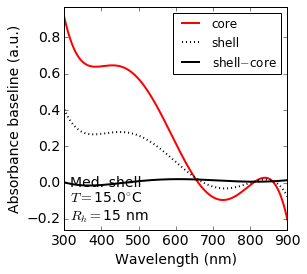

In [148]:
print('Sample spectrum')
print('===============')
def plotAndSave ():   
    ## Input data
    sampleNum = 1
    temp = spectraTemps[sampleNum][0] 
    
    plotArray = np.asarray(baselineSpectra)
    sortByShell = plotArray[:,-1] == sampleNum
    plotArray = plotArray[sortByShell]
    sortByTemp = plotArray[:,-2] == temp
    plotArray = plotArray[sortByTemp]
    x1, y1 = plotArray[:,0], plotArray[:,1]
    
    xCore, yCore = baselineSpectrumCore[:,0], baselineSpectrumCore[:,1]
    
    plotArray0 = np.asarray(baselineSpectra0)
    sortByShell = plotArray0[:,-1] == sampleNum
    plotArray0 = plotArray0[sortByShell]
    sortByTemp = plotArray0[:,-2] == temp
    plotArray0 = plotArray0[sortByTemp]
    x0, y0 = plotArray0[:,0], plotArray0[:,1]
    
    y = np.concatenate((y1, y0, yCore))
    x = x1
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y)-0.05*dy, np.amax(y)+0.05*dy]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(xCore, yCore, color='red', linewidth=2, label="core")
    pylab.plot(x0, y0, ':', color='black', linewidth=2, label="shell")
    pylab.plot(x1, y1, color='black', linewidth=2, label="shell$-$core")
    pylab.xlabel("Wavelength (nm)")
    pylab.ylabel("Absorbance baseline (a.u.)")
    figText = (['Thick','Med.','Thin'][sampleNum]+' shell'+'\n'
        +'$T=$'+str(temp)+'$^{\circ}$C'+'\n'
        + '$R_h=$'+str(int(plotArray[0][-2]))+' nm')
    pylab.text(xLimits[0]+0.025*dx, yLimits[0]+0.025*dy, figText, verticalalignment='bottom', horizontalalignment='left')
    pylab.legend(loc='upper right', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0], yLimits[1])
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_sample-spectrum" + exportFormat
    # pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


### 4.4.2 Plot of baseline corrected LSPR peak wavelength position vs tempearture

LSPR peak wavelength vs temperature
Exported to:
 graphics/20160907_wl-LSPR-corr-vs-temp.svg


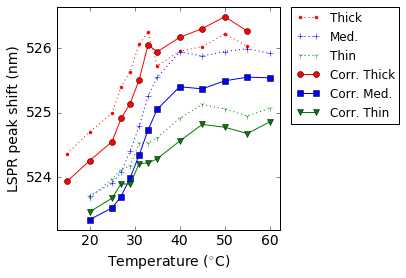

In [151]:
print('LSPR peak wavelength vs temperature')
print('===============')
def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakCorrArray[:,0:2]
    x, y = plotArray[:,1], plotArray[:,0]
    x1, y1 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x2, y2 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x3, y3 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    
    # Uncorrected data
    plotArray = lsprPeakArray[:,0:2]
    x, y = plotArray[:,1], plotArray[:,0]
    x01, y01 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x02, y02 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x03, y03 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    
    y = np.concatenate((y1, y2, y3, y01, y02, y03))
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    xLimits = (np.asarray(xLimits) + np.asarray([-0.05*dx, .05*dx])).tolist()
    yLimits = (np.asarray(yLimits) + np.asarray([-0.05*dy, .05*dy])).tolist()
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(x01, y01, '.:', color='red', label="Thick")
    pylab.plot(x02, y02, '+:', color='blue', label="Med.")
    pylab.plot(x03, y03, '1:', color='green', label="Thin")
    pylab.plot(x1, y1, 'o-', color='red', label="Corr. Thick")
    pylab.plot(x2, y2, 's-', color='blue', label="Corr. Med.")
    pylab.plot(x3, y3, 'v-', color='green', label="Corr. Thin")
    pylab.xlabel("Temperature ($^{\circ}$C)")
    pylab.ylabel("LSPR peak shift (nm)")
    pylab.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0], yLimits[1])
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_wl-LSPR-corr-vs-temp" + exportFormat
    pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


### 4.4.3 Plot of baseline corrected LSPR peak wavelength shift vs tempearture

LSPR peak wavelength vs temperature
Exported to:
 graphics/20160907_dwl-LSPR-corr-vs-temp.svg


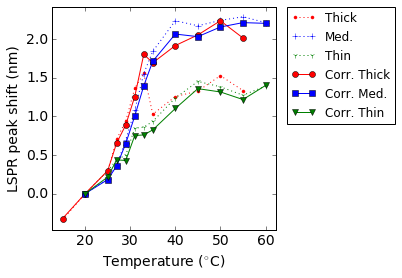

In [152]:
print('LSPR peak wavelength vs temperature')
print('===============')
def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakCorrArray[:,0:2]
    x, y = plotArray[:,1], plotArray[:,0]
    x1, y1 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x2, y2 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x3, y3 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    y1, y2, y3 = y1-y1[1], y2-y2[0], y3-y3[0] 
    
    # Uncorrected data
    plotArray = lsprPeakArray[:,0:2]
    x, y = plotArray[:,1], plotArray[:,0]
    x01, y01 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x02, y02 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x03, y03 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    y01, y02, y03 = y01-y01[1], y02-y02[0], y03-y03[0] 
    
    y = np.concatenate((y1, y2, y3, y01, y02, y03))
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    xLimits = (np.asarray(xLimits) + np.asarray([-0.05*dx, .05*dx])).tolist()
    yLimits = (np.asarray(yLimits) + np.asarray([-0.05*dy, .05*dy])).tolist()
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(x01, y01, '.:', color='red', label="Thick")
    pylab.plot(x02, y02, '+:', color='blue', label="Med.")
    pylab.plot(x03, y03, '1:', color='green', label="Thin")
    pylab.plot(x1, y1, 'o-', color='red', label="Corr. Thick")
    pylab.plot(x2, y2, 's-', color='blue', label="Corr. Med.")
    pylab.plot(x3, y3, 'v-', color='green', label="Corr. Thin")
    pylab.xlabel("Temperature ($^{\circ}$C)")
    pylab.ylabel("LSPR peak shift (nm)")
    pylab.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0], yLimits[1])
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_dwl-LSPR-corr-vs-temp" + exportFormat
    pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


### 4.4.4 Plot of baseline corrected LSPR peak shift vs relative hydrodynamic radius

LSPR peak wavelength vs hydrodynamic radius
using a core radius of 8.5 nm
Exported to:
 graphics/20160907_dwl-LSPR-corr-vs-shell-vol-frac.svg
Exported to:
 graphics/20160907_dwl-LSPR-corr-vs-shell-vol-frac.png


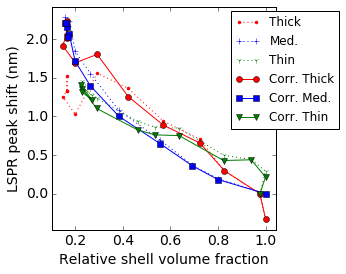

In [153]:
print('LSPR peak wavelength vs hydrodynamic radius')
print('===============')
print('using a core radius of 8.5 nm')
rCorenm = 8.5

def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakCorrArray[:,0:3:2]
    x, y = plotArray[:,1], plotArray[:,0]
    x1, y1 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x2, y2 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x3, y3 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    x1, x2, x3 = (x1-rCorenm)/(max(x1)-rCorenm), (x2-rCorenm)/(max(x2)-rCorenm), (x3-rCorenm)/(max(x3)-rCorenm)
    x1, x2, x3 = x1**3, x2**3, x3**3
    y1, y2, y3 = y1-y1[1], y2-y2[0], y3-y3[0] 
    
    # Uncorrected data
    plotArray = lsprPeakArray[:,0:3:2]
    x, y = plotArray[:,1], plotArray[:,0]
    x01, y01 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x02, y02 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x03, y03 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    x01, x02, x03 = (x01-rCorenm)/(max(x01)-rCorenm), (x02-rCorenm)/(max(x02)-rCorenm), (x03-rCorenm)/(max(x03)-rCorenm)
    x01, x02, x03 = x01**3, x02**3, x03**3
    y01, y02, y03 = y01-y01[1], y02-y02[0], y03-y03[0] 
    
    x = np.concatenate((x1, x2, x3, x01, x02, x03))
    y = np.concatenate((y1, y2, y3, y01, y02, y03))
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    xLimits = (np.asarray(xLimits) + np.asarray([-0.05*dx, .05*dx])).tolist()
    yLimits = (np.asarray(yLimits) + np.asarray([-0.05*dy, .05*dy])).tolist()
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(x01, y01, '.:', color='red', label="Thick")
    pylab.plot(x02, y02, '+:', color='blue', label="Med.")
    pylab.plot(x03, y03, '1:', color='green', label="Thin")
    pylab.plot(x1, y1, 'o-', color='red', label="Corr. Thick")
    pylab.plot(x2, y2, 's-', color='blue', label="Corr. Med.")
    pylab.plot(x3, y3, 'v-', color='green', label="Corr. Thin")
    pylab.xlabel("Relative shell volume fraction")
    pylab.ylabel("LSPR peak shift (nm)")
    pylab.legend(fontsize=12, bbox_to_anchor=(.8, .98), loc=2, borderaxespad=0.)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0], yLimits[1])
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_dwl-LSPR-corr-vs-shell-vol-frac" + exportFormat
    pylab.savefig(filename); print("Exported to:\n", filename)
    exportFormat = '.png'
    filename = "graphics/" + timestamp + "_dwl-LSPR-corr-vs-shell-vol-frac" + exportFormat
    pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


# 5. Mie theory modeling

If only the near-field refractive index of the shell is important to the LSPR peak position, then this effect can be modeled as a bare Au NP in a homogeneous medium of refractive index $n_{\mathrm{med}}$. Then we can use the experimental peak position to determine the effective/near-field refractive index. Assuming the near-field zone is relatively homogeneous, this can tell the volume fraction near the surface of the Au core NP.  

However, we expect deviations from this model. 
1. For the smallest shells the pure solvent will enter the near-field zone during collapse. Shell collapse beyond this point will not strongly affect the LSPR peak position. This should manifest as a plateau.
2. For larger shells shell scattering will contribute. Scattering at shorter wavelengths blue-shifts the peak position, limiting the otherwise red-shifting effect of shell collapse. This should also manifest as a plateau. For the largest shells, it may be that no red shift occurs (although the peak may be difficult to detect in this case).

## 5.1 Mie theory computations and peak fitting

### 5.1.1 Compute Mie theory spectra

In [403]:
print("Set parameter limits for computation")
print("====================================")

# parameter limits
rCorenm = 8.5
nmedMin, nmedMax, dnmed = 1.3, 1.555, 0.01
wl0Minnm, wl0Maxnm, dwl0nm = 350, 700, .5
lmax = 2

# check for lmax convergence
lmaxConvergeTable = []
startSec = time.time()
for nmed in [nmedMin, nmedMax]:
    result = mie_local.CextRelDipEMList(mie_local.CextEMListAu(lmax, rCorenm, nmed, wl0Minnm))
    lmaxConvergeTable.append(result[0])
    lmaxConvergeTable.append(result[1])
endSec = time.time()
print("Highest pole =",lmax,", max est. err. = ", format(100*max(lmaxConvergeTable), '.3f'),"%")
dtSec = endSec - startSec
cpuTimeSec = dtSec/2

nmedList = np.arange(nmedMin, nmedMax, dnmed)
nmedMax = np.amax(nmedList)
wl0Listnm = np.arange(wl0Minnm, wl0Maxnm, dwl0nm)
wl0Maxnm = np.amax(wl0Listnm)
print("Actual parameter ranges:")
print("  core radius:",rCorenm,"nm")
print("  refractive index:",[nmedMin, nmedMax],"x",dnmed)
print("  vacuum wavelength (nm):",[wl0Minnm, wl0Maxnm],"x",dwl0nm)

# contruct parameter list
paramList = []
for nmed in nmedList:
    for wl0nm in wl0Listnm:
        paramList.append([nmed, wl0nm])
paramArray = np.asarray(paramList)
Nsims = paramArray.shape[0]
print("Number of simulation instances = ", Nsims)
nProcs = nKernels
if nProcs == 0: nProcs = 1
print("  running on",nProcs,"processors")
print("  estimated",format(cpuTimeSec*1e3, '.3f'),"ms per instance")
print("Estimated run time = ",format(cpuTimeSec*Nsims/nProcs, '.3f'),"sec")

Set parameter limits for computation
Highest pole = 2 , max est. err. =  0.152 %
Actual parameter ranges:
  core radius: 8.5 nm
  refractive index: [1.3, 1.5500000000000003] x 0.01
  vacuum wavelength (nm): [350, 699.5] x 0.5
Number of simulation instances =  18200
  running on 2 processors
  estimated 0.000 ms per instance
Estimated run time =  0.000 sec


In [404]:
# Compute extinction cross section
print("Compute extinction spectra, parallel kernels")
print("============================================")
# return: vacuum wavelength (nm), 
#         refractive index, 
#         total scattering efficiency
#         total absorption efficiency
#         total extinction efficiency
def calcAtom(params):
    [nmed, wl0nm] = params
    [Cext,Cabs,Csca] = mie_local.CExtAbsScaAu(lmax, rCorenm, nmed, wl0nm)
    return [wl0nm, nmed, Cext,Cabs,Csca]

# distribute atom definition to parallel kernels
cluster.push(dict(
        lmax = lmax,
        rCorenm = rCorenm,
        calcAtom = calcAtom
    ))

# Loop over parameters
print("Computing ... ", end="")
startSec = time.time()
spectraAuLSPRList = list(cluster.map_sync(calcAtom, paramArray))
endSec = time.time()
print("done")
dtSec = endSec - startSec
spectraAuLSPRArray = np.asarray(spectraAuLSPRList)
Ncalcs = spectraAuLSPRArray.shape[0]
print("Run time = ", format(dtSec, '.3f'),"sec")
print("Time per simulation instance = ", format(1000*dtSec*nProcs/Ncalcs, '.3f'),"ms")
print("Return format: [ wl-nm, nmed, CExt-nm2, CAbs-nm2, CSca-nm2 ]")

Compute extinction spectra, parallel kernels
Computing ... done
Run time =  3.594 sec
Time per simulation instance =  0.395 ms
Return format: [ wl-nm, nmed, CExt-nm2, CAbs-nm2, CSca-nm2 ]


### 5.1.2 Sample plot to check results

Sample spectrum


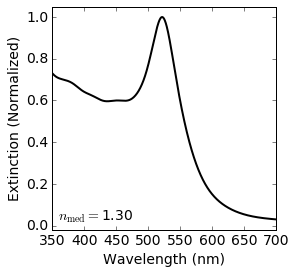

In [405]:
print('Sample spectrum')
print('===============')
def plotAndSave ():   
    ## Input data
    nmed = nmedList[0]
    
    sortBynmed = spectraAuLSPRArray[:,1] == nmed
    plotArray = spectraAuLSPRArray[sortBynmed]
    x, y = plotArray[:,0], plotArray[:,2]
    y = y/np.amax(y)
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y)-np.amax(y)*.05, np.amax(y)*1.05]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(x, y, color='black', linewidth=2, label="+PNIPAM")
    pylab.xlabel("Wavelength (nm)")
    pylab.ylabel("Extinction (Normalized)")
    figText = ('$n_{\mathrm{med}}=$'+str(format(nmed,'.2f')))
    pylab.text(xLimits[0]+0.025*dx, yLimits[0]+0.025*dy, figText, verticalalignment='bottom', horizontalalignment='left')
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0], yLimits[1])
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_sample-spectrum" + exportFormat
    #pylab.savefig(filename, transparent=True)
    #print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


### 5.1.3 LSPR peak fitting

In [409]:
print("LSPR analysis")
print("=============")
print("Peak detection")
threshold = 0.25

lsprMiePeakList = []
for nmed in nmedList:
    sortByRI = spectraAuLSPRArray[:,1] == nmed
    dataSubArray = spectraAuLSPRArray[sortByRI]
    if dataSubArray.size > 0:
        x, y = dataSubArray[:,0], dataSubArray[:,2]
        base = peakutils.baseline(y,2)
        yCorr = y - 0*base
        indexes = peakutils.indexes(y, thres=threshold, min_dist=10)
        indexesCorr = peakutils.indexes(yCorr, thres=threshold, min_dist=10)
        if indexes.size > 0: 
            if indexes.size > 1: indexes = [indexes[-1]]
            wlPeaknm = peakutils.interpolate(x, y, ind=indexes)
            lsprMiePeakList.append([ nmed, wlPeaknm[0] ])
lsprMiePeakArray = np.asarray(lsprMiePeakList)
print("  * output array format: [ nmed, wl-nm ]")
print("  * LSPR peak min/max at (",format(np.amin(lsprMiePeakArray[:,1]),'.1f'),"nm,",format(np.amax(lsprMiePeakArray[:,1]),'.1f'),"nm )")

LSPR analysis
Peak detection
  * output array format: [ nmed, wl-nm ]
  * LSPR peak min/max at ( 521.7 nm, 536.6 nm )


### 5.1.4 Plot of LSPR peak position vs refractive index

LSPR Peak wavelength
Core radius = 8 nm
Exported to:
 graphics/20160906_lspr-wl-nm-vs-nmed.svg


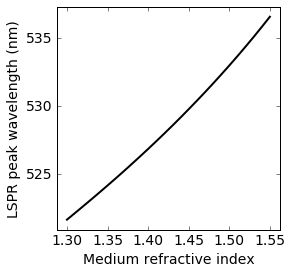

In [411]:
print('LSPR Peak wavelength')
print('====================')
print('Core radius =',str(int(rCorenm)),"nm")
def plotAndSave ():   
    ## Input data
    plotArray = lsprMiePeakArray
    x, y = plotArray[:,0], plotArray[:,1]
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(x, y, color='black', linewidth=2, label="LSPR")
    pylab.xlabel("Medium refractive index")
    pylab.ylabel("LSPR peak wavelength (nm)")
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0]-.05*dx, xLimits[1]+.05*dx)
    pylab.ylim(yLimits[0]-.05*dy, yLimits[1]+.05*dy)
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_lspr-wl-nm-vs-nmed" + exportFormat
    pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


### 5.1.5 LSPR peak fitting with built-in baseline correction

In [410]:
print("LSPR analysis")
print("=============")
print("Peak detection with built-in baseline correction")
threshold = 0.25

lsprMiePeakCorrList = []
for nmed in nmedList:
    sortByRI = spectraAuLSPRArray[:,1] == nmed
    dataSubArray = spectraAuLSPRArray[sortByRI]
    if dataSubArray.size > 0:
        x, y = dataSubArray[:,0], dataSubArray[:,2]
        base = peakutils.baseline(y,2)
        yCorr = y - base
        indexes = peakutils.indexes(y, thres=threshold, min_dist=10)
        indexesCorr = peakutils.indexes(yCorr, thres=threshold, min_dist=10)
        if indexesCorr.size > 0: 
            if indexesCorr.size > 1: indexesCorr = [indexesCorr[-1]]
            wlPeaknm = peakutils.interpolate(x, yCorr, ind=indexesCorr)
            lsprMiePeakCorrList.append([ nmed, wlPeaknm[0] ])
lsprMiePeakCorrArray = np.asarray(lsprMiePeakCorrList)
print("  * output array format: [ nmed, wl-nm ]")
print("  * LSPR peak min/max at (",format(np.amin(lsprMiePeakCorrArray[:,1]),'.1f'),"nm,",format(np.amax(lsprMiePeakCorrArray[:,1]),'.1f'),"nm )")
print("  * uncorr. LSPR peak min/max at (",format(np.amin(lsprMiePeakArray[:,1]),'.1f'),"nm,",format(np.amax(lsprMiePeakArray[:,1]),'.1f'),"nm )")

LSPR analysis
Peak detection with built-in baseline correction
  * output array format: [ nmed, wl-nm ]
  * LSPR peak min/max at ( 523.2 nm, 537.8 nm )
  * uncorr. LSPR peak min/max at ( 521.7 nm, 536.6 nm )


### 5.1.6 Plot of Baseline corrected LSPR peak position vs refractive index

Baseline-corrected LSPR  peak wavelength
Core radius = 8 nm


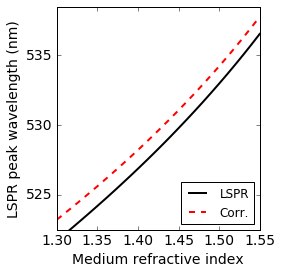

In [417]:
print('Baseline-corrected LSPR  peak wavelength')
print('====================')
print('Core radius =',str(int(rCorenm)),"nm")
def plotAndSave ():   
    ## Input data
    plotArray = lsprMiePeakCorrArray
    x, y = plotArray[:,0], plotArray[:,1]
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    x0, y0 = lsprMiePeakArray[:,0], lsprMiePeakArray[:,1]
    
    ## Specific format options
    pylab.plot(x0, y0, color='black', linewidth=2, label="LSPR")
    pylab.plot(x, y, '--', color='red', linewidth=2, label="Corr.")
    pylab.xlabel("Medium refractive index")
    pylab.ylabel("LSPR peak wavelength (nm)")
    pylab.legend(loc='lower right', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0]-.05*dy, yLimits[1]+.05*dy)
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_lspr-wl-nm-vs-nmed" + exportFormat
    # pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


## 5.2 Correlate Mie theory with experimental spectra

### 5.2.1 Plot of near-field/effective refractive index vs hydrodynamic radius

Near-field refractive index vs hydrodynamic radius
Exported to:
 graphics/20160906_wl-LSPR-vs-Rh.svg


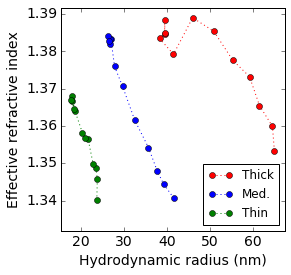

In [421]:
nmedOfMieLSPRnm = interpolate.interp1d(lsprMiePeakArray[:,1], lsprMiePeakArray[:,0], kind="cubic")
lsprPeaknmedArray = np.asarray(list(map(nmedOfMieLSPRnm, lsprPeakArray[:,0])))

print('Near-field refractive index vs hydrodynamic radius')
print('===============')
def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakArray[:,0:3:2]
    x, y = plotArray[:,1], lsprPeaknmedArray
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    x1, y1 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x2, y2 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x3, y3 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    
    ## Specific format options
    pylab.plot(x1, y1, 'o:', color='red', label="Thick")
    pylab.plot(x2, y2, 'o:', color='blue', label="Med.")
    pylab.plot(x3, y3, 'o:', color='green', label="Thin")
    pylab.ylabel("Effective refractive index")
    pylab.xlabel("Hydrodynamic radius (nm)")
    pylab.legend(loc='lower right', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0]-0.05*dx, xLimits[1]+0.05*dx)
    pylab.ylim(yLimits[0]-0.05*dy, yLimits[1]+0.05*dy)
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_wl-LSPR-vs-Rh" + exportFormat
    pylab.savefig(filename, transparent=True); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


### 5.2.2 Plot of near-field/effective polymer volume fraction vs hydrodynamic radius

Polymer volume fraction vs hydrodynamic radius
Estimated from effective/near-field refractive index
Refractive index converted to volume fraction using simple model from Arago and Biot
Using PNIPAM n = 1.51 , and water n = 1.3356706385047694


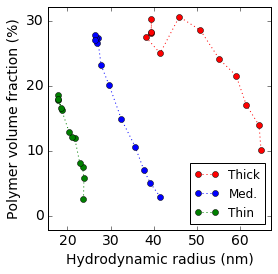

In [420]:
nmedOfMieLSPRnm = interpolate.interp1d(lsprMiePeakArray[:,1], lsprMiePeakArray[:,0], kind="cubic")
nPNIPAM = 1.51
nSolv = np.real(ri.nH2O(525))
lsprPeaknmedArray = np.asarray(list(map(nmedOfMieLSPRnm, lsprPeakArray[:,0])))
volFracArray = (lsprPeaknmedArray - nSolv)/(nPNIPAM-nSolv)

print('Polymer volume fraction vs hydrodynamic radius')
print('===============')
print('Estimated from effective/near-field refractive index')
print('Refractive index converted to volume fraction using simple model from Arago and Biot')
print('Using PNIPAM n =', nPNIPAM, ', and water n =', nSolv)
def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakArray
    x, y = plotArray[:,2], 100*volFracArray
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    x1, y1 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x2, y2 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x3, y3 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    
    ## Specific format options
    pylab.plot(x1, y1, 'o:', color='red', label="Thick")
    pylab.plot(x2, y2, 'o:', color='blue', label="Med.")
    pylab.plot(x3, y3, 'o:', color='green', label="Thin")
    pylab.ylabel("Polymer volume fraction (%)")
    pylab.xlabel("Hydrodynamic radius (nm)")
    pylab.legend(loc='lower right', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0]-0.05*dx, xLimits[1]+0.05*dx)
    pylab.ylim(yLimits[0]-0.05*dy, yLimits[1]+0.05*dy)
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_vol-frac-vs-Rh" + exportFormat
    # pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


### 5.2.3 Grafting density caclulations and plots

*Simplest model*  
The polymer volume fraction $\phi$ is equivalent to the surface area fraction at the surface of the Au core NP. The surface area fraction is the ratio of the area taken up by polymer $A_p$ to the surface area of the core ${SA}_{\mathrm{core}}=4\pi R_{\mathrm{core}}^2$: 
$$ \phi\approx A_p/{SA}_{\mathrm{core}}. $$
The  polymer area is $A_p = N a_p = \sigma {SA}_{\mathrm{core}} a_p$, where $N$ is the number of grafted chains; $a_p$ is the cross sectional area of a single chain, estimated to be $A_p = 0.19 \mathrm{nm}^2$ (Tagliazucchi et al, 2012); and $\sigma$ is the grafting density. Thus, the grafting density can be approximately calculated to be 
$$ \sigma\approx \phi/a_p .$$
This formula is expected to only give an order of magnitude estimate.

Grafting density vs hydrodynamic radius
Estimated from effective/near-field refractive index
At the surface the volume fraction = surface area fraction
Using PNIPAM n = 1.51 , and water n = 1.3356706385047694
Single polymer cross section = 0.19 nm^2


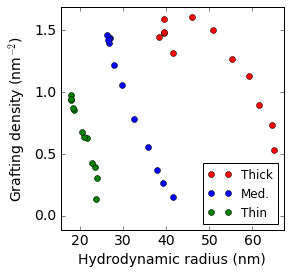

In [422]:
nmedOfMieLSPRnm = interpolate.interp1d(lsprMiePeakArray[:,1], lsprMiePeakArray[:,0], kind="cubic")
nPNIPAM = 1.51
nSolv = np.real(ri.nH2O(525))
lsprPeaknmedArray = np.asarray(list(map(nmedOfMieLSPRnm, lsprPeakArray[:,0])))
volFracArray = (lsprPeaknmedArray - nSolv)/(nPNIPAM-nSolv)
segVolnm3, segLnm = 0.095, 0.5 # Taken from Tagliazucchi et al 2012, http://dx.doi.org/10.1021/nn303221y
segAnm2 = segVolnm3/segLnm
graftingDensityArray = volFracArray/segAnm2

print('Grafting density vs hydrodynamic radius')
print('===============')
print('Estimated from effective/near-field refractive index')
print('At the surface the volume fraction = surface area fraction')
print('Using PNIPAM n =', nPNIPAM, ', and water n =', nSolv)
print('Single polymer cross section =',segAnm2,"nm^2")
def plotAndSave ():   
    ## Input data
    plotArray = lsprPeakArray
    x, y = plotArray[:,2], graftingDensityArray
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    x1, y1 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x2, y2 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x3, y3 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    
    ## Specific format options
    pylab.plot(x1, y1, 'o', color='red', label="Thick")
    pylab.plot(x2, y2, 'o', color='blue', label="Med.")
    pylab.plot(x3, y3, 'o', color='green', label="Thin")
    pylab.ylabel("Grafting density (nm$^{-2}$)")
    pylab.xlabel("Hydrodynamic radius (nm)")
    pylab.legend(loc='lower right', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0]-0.05*dx, xLimits[1]+0.05*dx)
    pylab.ylim(yLimits[0]-0.05*dy, yLimits[1]+0.05*dy)
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_vol-frac-vs-Rh" + exportFormat
    # pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


*Thickness dependent model*  
Each polymer chain occupies the volume $v_p = a_p \ell = a_p m t$, where $a_p$ is the cross sectional area of a single polymer chain, estimated to be $a_p = 0.19 \mathrm{nm}^2$ (Tagliazucchi et al, 2012); $\ell$ is the chain length; $t = R_h - R_{\mathrm{core}}$ is the shell thickness computed from the DLS data, and $m=t/\ell$ is the coiling ratio, here estimated at $m\sim3$ when swollen. Then the volume occupied by all polymer chains is $V_p = N a_p m t$, where $N$ is the number of chains. The number of chains is related to the grafting density $\sigma$ by $N = \sigma\times 4\pi R_{\mathrm{core}}^2$. With a total shell volume $V_{\mathrm{shell}} = \frac43 \pi \left(R_h^3-R_{\mathrm{core}}^3\right)$, the grafting density can be computed from the volume fraction $\phi$ 
$$ \sigma = \phi \frac{\frac43\pi (R_h^3 - R_{\mathrm{core}}^3)}{a_p m (R_h - R_{\mathrm{core}})\,4\pi R_{\mathrm{core}}^2}$$

Grafting density vs hydrodynamic radius
Estimated from effective/near-field refractive index
At the surface the volume fraction = surface area fraction
Using PNIPAM n = 1.51 , and water n = 1.3356706385047694
Single polymer cross section = 0.19 nm^2
Core radius = 8.5 nm


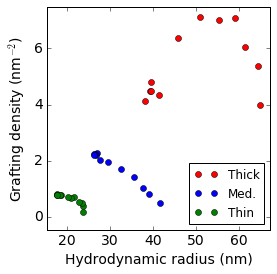

In [424]:
nmedOfMieLSPRnm = interpolate.interp1d(lsprMiePeakArray[:,1], lsprMiePeakArray[:,0], kind="cubic")
nPNIPAM = 1.51
nSolv = np.real(ri.nH2O(525))
lsprPeaknmedArray = np.asarray(list(map(nmedOfMieLSPRnm, lsprPeakArray[:,0])))
volFracArray = (lsprPeaknmedArray - nSolv)/(nPNIPAM-nSolv)
segVolnm3, segLnm = 0.095, 0.5 # Taken from Tagliazucchi et al 2012, http://dx.doi.org/10.1021/nn303221y
segAnm2 = segVolnm3/segLnm
coilm = 3
RhnmArray = lsprPeakArray[:,2]
shellVolnm3Array = (4/3)*pi*(RhnmArray**3-rCorenm**3)
graftingDensityArray = volFracArray*shellVolnm3Array/(segAnm2*coilm*(RhnmArray-rCorenm)*4*pi*rCorenm**2)

print('Grafting density vs hydrodynamic radius')
print('===============')
print('Estimated from effective/near-field refractive index')
print('At the surface the volume fraction = surface area fraction')
print('Using PNIPAM n =', nPNIPAM, ', and water n =', nSolv)
print('Single polymer cross section =',segAnm2,"nm^2")
print('Core radius =',rCorenm,"nm")
def plotAndSave ():   
    ## Input data
    x, y = RhnmArray, graftingDensityArray
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    x1, y1 = x[:len(spectraTemps[0])], y[:len(spectraTemps[0])]
    x2, y2 = x[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])], y[len(spectraTemps[0])+1:len(spectraTemps[0])+len(spectraTemps[1])]
    x3, y3 = x[len(spectraTemps[0])+len(spectraTemps[1])+1:], y[len(spectraTemps[0])+len(spectraTemps[1])+1:]
    
    ## Specific format options
    pylab.plot(x1, y1, 'o', color='red', label="Thick")
    pylab.plot(x2, y2, 'o', color='blue', label="Med.")
    pylab.plot(x3, y3, 'o', color='green', label="Thin")
    pylab.ylabel("Grafting density (nm$^{-2}$)")
    pylab.xlabel("Hydrodynamic radius (nm)")
    pylab.legend(loc='lower right', fontsize=12)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0]-0.05*dx, xLimits[1]+0.05*dx)
    pylab.ylim(yLimits[0]-0.05*dy, yLimits[1]+0.05*dy)
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics/" + timestamp + "_vol-frac-vs-Rh" + exportFormat
    # pylab.savefig(filename); print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 
